#### Задача 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

def generate_correlated_random(cov_matrix, size=1, mean=None):

    n = cov_matrix.shape[0]
    A = cholesky(cov_matrix, lower=True)

    z = np.random.randn(size, n)
    mean = np.mean(z, axis=0)
    x = mean + z @ A.T
    
    return x

#### Задача 2

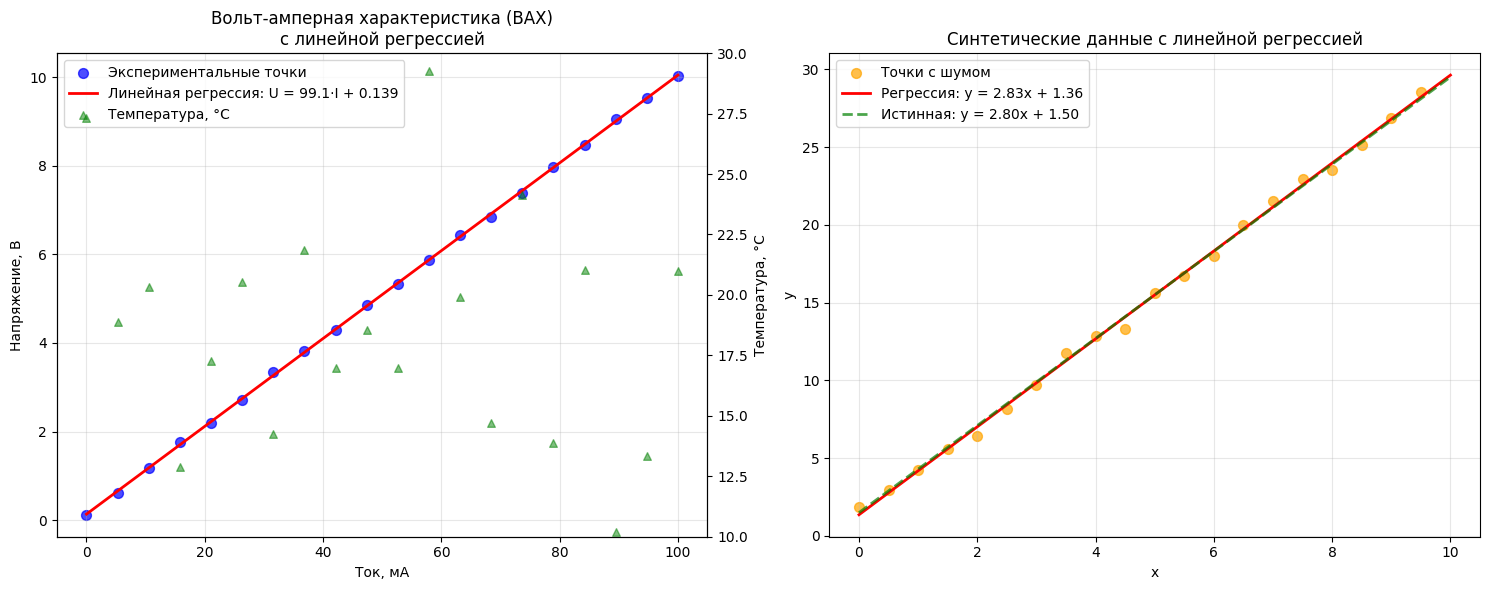

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

np.random.seed(42)

true_R = 100.0 
true_U0 = 0.1  

I_exp = np.linspace(0, 0.1, 20)  
noise = np.random.normal(0, 0.05, size=I_exp.shape) 
U_exp = true_R * I_exp + true_U0 + noise 

data_exp = pd.DataFrame({
    'I_A': I_exp,
    'U_V': U_exp
})

T0 = 20 
alpha = 0.004  
T_exp = T0 + np.random.normal(0, 5, size=I_exp.shape) 

data_exp['T_C'] = T_exp

X_exp = data_exp[['I_A']].values 
y_exp = data_exp['U_V'].values  

model_exp = LinearRegression()
model_exp.fit(X_exp, y_exp)

R_exp = model_exp.coef_[0] 
U0_exp = model_exp.intercept_  

I_line = np.linspace(0, 0.1, 100)
U_pred_exp = model_exp.predict(I_line.reshape(-1, 1))

true_w1 = 2.8  
true_w0 = 1.5  

xs = np.arange(0, 10, 0.5)
noise_synth = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise_synth

model_synth = LinearRegression()
model_synth.fit(xs.reshape(-1, 1), ys)

w1_synth = model_synth.coef_[0]
w0_synth = model_synth.intercept_

xs_line = np.linspace(0, 10, 100)
ys_pred = model_synth.predict(xs_line.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(data_exp['I_A']*1000, data_exp['U_V'], alpha=0.7, s=50, 
           label='Экспериментальные точки', color='blue')
ax1.plot(I_line*1000, U_pred_exp, 'r-', linewidth=2, 
        label=f'Линейная регрессия: U = {R_exp:.1f}·I + {U0_exp:.3f}')
ax1.set_xlabel('Ток, мА')
ax1.set_ylabel('Напряжение, В')
ax1.set_title('Вольт-амперная характеристика (ВАХ)\nс линейной регрессией')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax1_twin = ax1.twinx()
scatter_temp = ax1_twin.scatter(data_exp['I_A']*1000, data_exp['T_C'], 
                               alpha=0.5, s=30, color='green', marker='^',
                               label='Температура, °C')
ax1_twin.set_ylabel('Температура, °C')
ax1_twin.set_ylim(10, 30)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax2.scatter(xs, ys, alpha=0.7, s=50, label='Точки с шумом', color='orange')
ax2.plot(xs_line, ys_pred, 'r-', linewidth=2, 
        label=f'Регрессия: y = {w1_synth:.2f}x + {w0_synth:.2f}')
ax2.plot(xs_line, true_w1 * xs_line + true_w0, 'g--', linewidth=2, 
        alpha=0.7, label=f'Истинная: y = {true_w1:.2f}x + {true_w0:.2f}')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Синтетические данные с линейной регрессией')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

#### Задача 3

$$
L(\mu, \sigma) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

Переходим к логарифму для упрощения вычислений:
$$
\ell(\mu, \sigma) = \ln L(\mu, \sigma) = \sum_{i=1}^N \left[ -\frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln(\sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \right]
$$

Упрощаем:
$$
\ell(\mu, \sigma) = -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^N (x_i - \mu)^2
$$

Находим частную производную по $\mu$:
$$
\frac{\partial \ell}{\partial \mu} = -\frac{1}{2\sigma^2} \sum_{i=1}^N 2(x_i - \mu)(-1) = \frac{1}{\sigma^2} \sum_{i=1}^N (x_i - \mu)
$$

Приравниваем к нулю:
$$
\frac{1}{\sigma^2} \sum_{i=1}^N (x_i - \mu) = 0 \quad \Rightarrow \quad \sum_{i=1}^N (x_i - \mu) = 0
$$

Получаем:
$$
\sum_{i=1}^N x_i - N\mu = 0 \quad \Rightarrow \quad \mu = \frac{1}{N}\sum_{i=1}^N x_i
$$

Подставим найденное $\mu$ и перепишем логарифмическое правдоподобие:
$$
\ell(\sigma) = -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^N (x_i - \mu)^2
$$

Введем обозначение для выборочной дисперсии:
$$
S = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2
$$

Тогда:
$$
\ell(\sigma) = -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln(\sigma^2) - \frac{N}{2}\frac{S}{\sigma^2}
$$

Дифференцируем по $\sigma^2$:
$$
\frac{\partial \ell}{\partial (\sigma^2)} = -\frac{N}{2}\frac{1}{\sigma^2} + \frac{N}{2}\frac{S}{(\sigma^2)^2}
$$

Приравниваем к нулю:
$$
-\frac{1}{\sigma^2} + \frac{S}{(\sigma^2)^2} = 0 \quad \Rightarrow \quad \frac{S}{(\sigma^2)^2} = \frac{1}{\sigma^2}
$$

Умножаем на $(\sigma^2)^2$:
$$
S = \sigma^2 \quad \Rightarrow \quad \sigma^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2
$$

Итоговые оценки максимального правдоподобия:
$$
\boxed{\mu_{ML} = \frac{1}{N}\sum_{i=1}^N x_i}
$$
$$
\boxed{\sigma_{ML}^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu_{ML})^2}
$$


#### Задача 4

Рассмотрим обобщение на случай, когда каждая точка имеет свою $y$-погрешность $s_i$. Усреднение проводится по многомерному нормальному распределению:

$$
p(\hat{y}) = \frac{1}{(2\pi)^{l/2} \sqrt{\det A^{-1}}} \exp\left( -\frac{(\hat{y}-y)^T A(\hat{y}-y)}{2} \right)
$$

где $\hat{y} = (\hat{y}_1, \ldots, \hat{y}_l)^T$, $y = (y_1, \ldots, y_l)^T$.

Покажем, что распределение правильно нормировано. Выполним замену координат:

$$
\hat{y} - y = S z
$$

где матрица $S$ диагонализует $A$. Поскольку $A$ симметричная положительно определенная матрица, существует ортогональная матрица $U$ такая, что:

$$
A = U \Lambda U^T, \quad \Lambda = \text{diag}(\lambda_1, \ldots, \lambda_l)
$$

где $\lambda_i > 0$. Выберем $S = U \Lambda^{-1/2}$, тогда:

$$
S^T A S = \Lambda^{-1/2} U^T (U \Lambda U^T) U \Lambda^{-1/2} = I
$$

Якобиан преобразования: $d\hat{y} = |\det S| dz = \frac{1}{\sqrt{\det A}} dz$

Тогда интеграл нормировки:

$$
\int p(\hat{y}) d\hat{y} = \frac{1}{(2\pi)^{l/2} \sqrt{\det A^{-1}}} \int \exp\left( -\frac{z^T z}{2} \right) \frac{1}{\sqrt{\det A}} dz
$$

Учитывая, что $\sqrt{\det A^{-1}} \cdot \frac{1}{\sqrt{\det A}} = 1$, получаем:

$$
\int p(\hat{y}) d\hat{y} = \frac{1}{(2\pi)^{l/2}} \int \exp\left( -\frac{z^T z}{2} \right) dz = 1
$$

что доказывает правильную нормировку распределения.


Вычислим неприводимые парные корреляторы $\langle \langle \hat{y}_i \hat{y}_j \rangle \rangle$. Сделаем замену:

$$
\hat{y} - y = Y
$$

Рассмотрим производящий функционал:

$$
Z[J] = \int d^l Y \exp\left( -\frac{1}{2} Y^T A Y + J^T Y \right)
$$

Выполним замену $Y = S z$, где $S$ как и ранее:

$$
Z[J] = \frac{1}{\sqrt{\det A}} \int d^l z \exp\left( -\frac{1}{2} z^T z + J^T S z \right)
$$

Это гауссов интеграл:

$$
Z[J] = \frac{1}{\sqrt{\det A}} (2\pi)^{l/2} \exp\left( \frac{1}{2} J^T S S^T J \right)
$$

Но $S S^T = A^{-1}$, поэтому:

$$
Z[J] = \frac{(2\pi)^{l/2}}{\sqrt{\det A}} \exp\left( \frac{1}{2} J^T A^{-1} J \right)
$$

Теперь вычислим средние значения. Первый момент:

$$
\langle Y_i \rangle = \frac{1}{Z[0]} \frac{\partial Z[J]}{\partial J_i}\bigg|_{J=0} = 0
$$

Второй момент:

$$
\langle Y_i Y_j \rangle = \frac{1}{Z[0]} \frac{\partial^2 Z[J]}{\partial J_i \partial J_j}\bigg|_{J=0}
$$

Дифференцируем:

$$
\frac{\partial Z[J]}{\partial J_i} = Z[J] (A^{-1} J)_i
$$

$$
\frac{\partial^2 Z[J]}{\partial J_i \partial J_j} = Z[J] \left[ (A^{-1} J)_i (A^{-1} J)_j + (A^{-1})_{ij} \right]
$$

При $J = 0$ получаем:

$$
\langle Y_i Y_j \rangle = (A^{-1})_{ij}
$$

Таким образом, неприводимые парные корреляторы:

$$
\langle \langle \hat{y}_i \hat{y}_j \rangle \rangle = \langle (\hat{y}_i - y_i)(\hat{y}_j - y_j) \rangle = (A^{-1})_{ij}
$$

В частном случае, когда $A$ диагональна: $A = \text{diag}(1/s_1^2, \ldots, 1/s_l^2)$, получаем:

$$
\langle \langle \hat{y}_i \hat{y}_j \rangle \rangle = \delta_{ij} s_i^2
$$

что соответствует независимым погрешностям с различными дисперсиями.

#### Задача 5

Решение МНК: $\hat{w} = (X^T X)^{-1} X^T \hat{y}$

Погрешность параметров: $\delta w = \hat{w} - w = (X^T X)^{-1} X^T (\hat{y} - y)$

Ковариационная матрица погрешностей параметров:

$$
\langle \delta w \delta w^T \rangle = (X^T X)^{-1} X^T \langle (\hat{y} - y)(\hat{y} - y)^T \rangle X (X^T X)^{-1}
$$

Из предыдущего пункта: $\langle (\hat{y}_i - y_i)(\hat{y}_j - y_j) \rangle = (A^{-1})_{ij}$

Следовательно:

$$
\langle \delta w \delta w^T \rangle = (X^T X)^{-1} X^T A^{-1} X (X^T X)^{-1}
$$

Диагональные элементы этой матрицы дают дисперсии параметров:

$$
\sigma^2_{w_k} = \left[ (X^T X)^{-1} X^T A^{-1} X (X^T X)^{-1} \right]_{kk}
$$


Для диагональной матрицы $A = \text{diag}(A_1, \ldots, A_l)$ имеем:

$$
A^{-1} = \text{diag}\left(\frac{1}{A_1}, \ldots, \frac{1}{A_l}\right)
$$

Чтобы моделировать $y$-погрешность $i$-ой точки, равную $s_i$, нужно:

$$
\langle (\hat{y}_i - y_i)^2 \rangle = s_i^2
$$

Но $\langle (\hat{y}_i - y_i)^2 \rangle = (A^{-1})_{ii} = \frac{1}{A_i}$

Следовательно:

$$
\frac{1}{A_i} = s_i^2 \quad \Rightarrow \quad A_i = \frac{1}{s_i^2}
$$

Таким образом, для диагональной матрицы:

$$
A = \text{diag}\left(\frac{1}{s_1^2}, \frac{1}{s_2^2}, \ldots, \frac{1}{s_l^2}\right)
$$

Ковариационная матрица параметров в этом случае:

$$
\langle \delta w \delta w^T \rangle = (X^T X)^{-1} X^T \text{diag}(s_1^2, \ldots, s_l^2) X (X^T X)^{-1}
$$

Это соответствует взвешенному МНК с весами, обратно пропорциональными дисперсиям измерений.